In [219]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [220]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [221]:
iris = load_iris()

In [222]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [223]:
### загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [224]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [225]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [226]:
data_sepal = data[['sepal length (cm)', 'sepal width (cm)']]
data_sepal.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### 3. Разделите данные на выборку для обучения и тестирования

In [227]:
### разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_sepal, data_class, test_size=0.25)

### 4. Постройте модель LDA

In [228]:
### импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [229]:
lda = LinearDiscriminantAnalysis()

In [230]:
### обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [231]:
### делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2])

In [232]:
### смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,2,2
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [233]:
### расчет точности - отношение верный прогнозов к общему количеству позиций
### является хорошей метрикой для сбалансированных классов 
### (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [234]:
### узнаем точность
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

   ### 5. Визуализируйте предсказания для тестовой выборки и центры классов

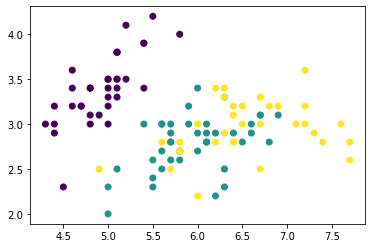

In [235]:
### визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [236]:
### посмотрим на наши центроиды
lda.means_

array([[4.94      , 3.4       ],
       [5.95121951, 2.7804878 ],
       [6.51666667, 2.94444444]])

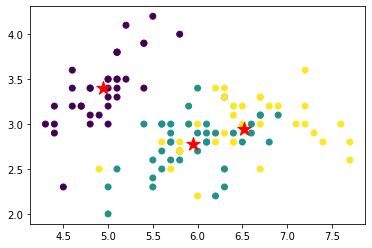

In [237]:
### сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
### центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=200, marker='*')

In [238]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

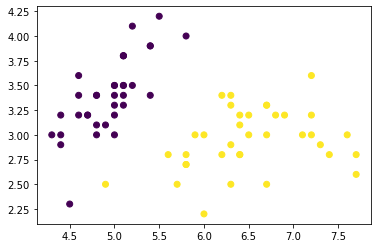

In [239]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [240]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [241]:
### посмотрим на наши центроиды
lda_small.means_

array([[4.94      , 3.4       ],
       [6.51666667, 2.94444444]])

<ipython-input-242-c36b3de7b9ac>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


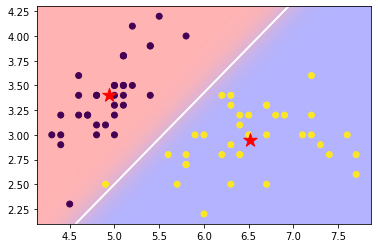

In [242]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1],  c='r', s=200, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [243]:
lda_small.coef_

array([[ 8.56194143, -9.25161109]])

In [244]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [245]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [246]:
lr = LogisticRegression()

In [247]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [248]:
lr.predict(small_test)

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2])

In [249]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [250]:
lr.coef_

array([[ 2.88010228, -1.8911668 ]])

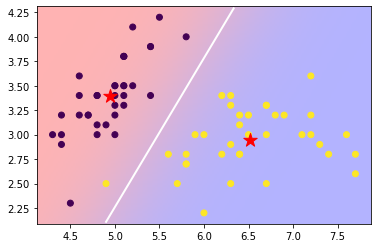

In [251]:
### сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

### центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1],  c='r', s=200, marker='*')

### делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

### предсказываем класс каждой точки нашей сетки
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

### закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

### отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [252]:
from sklearn.cluster import KMeans

In [253]:
### приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [254]:
scaler = StandardScaler()

In [255]:
X=iris.data

In [256]:
X_scaled = scaler.fit_transform(X)

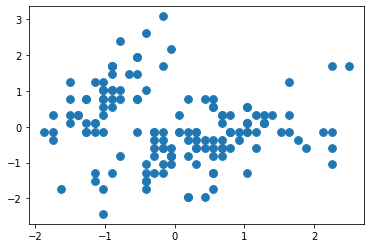

In [257]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=60)

### 7.  Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [258]:
### строим график локтя

### создаем список для инерции
k_inertia = []

### задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    ### добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

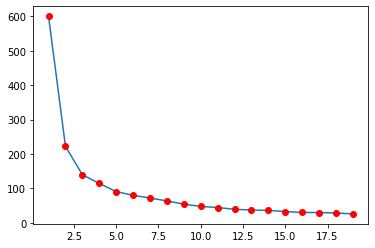

In [259]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [214]:
### явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

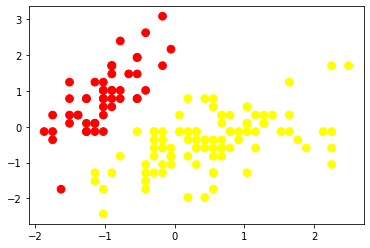

In [260]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [261]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

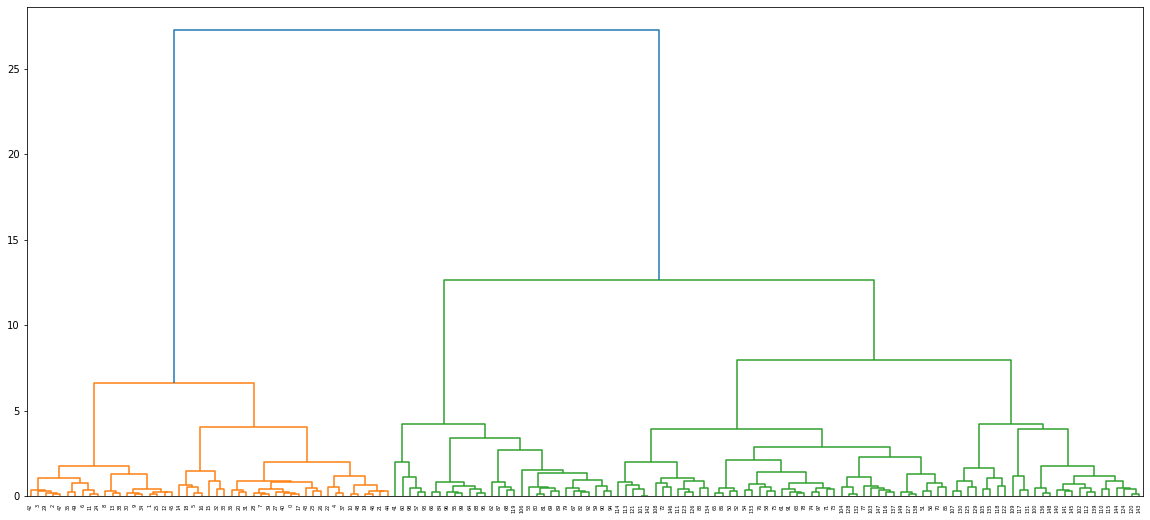

In [262]:
### строим дендрограмму
distance_mat = pdist(X_scaled) ### pdist посчитает нам матрицу попарных расстояний между точками
### Z = hierarchy.linkage(distance_mat) ### linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)